<h2><center> LeNet Model -Deep Neuron AI </center></h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
torch.manual_seed(91) # set the random seed to ensure the reproducibility of this execise

In [3]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cn1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
    self.cn2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
    self.fc1 = nn.Linear(16*5*5, 120) # 5*5 is the spatial dimension at this layer
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    self.relu = nn.ReLU()
    self.max_pooling = nn.MaxPool2d(kernel_size=2, stride=2)

  def forward(self, x):
    # convolution with 5x5 kernel
    output = self.cn1(x)
    output = self.relu(output)
    # max pooling with over a (2, 2) window
    output = self.max_pooling(output)
    # convolution with 5x5 kernel
    output = self.cn2(output)
    # max pooling with over a (2, 2) window
    output = self.max_pooling(output)
    # flatten spatial and depth dimensions into a single vector
    output = output.view(-1, self.flatten(output))
    # fully connected layer 120
    output = self.fc1(output)
    # fully connected layer 84
    output = self.fc2(output)
    # fully connected layer 84
    output = self.fc3(output)
    return output

  def flatten(self, x):
    # meant to calculate the total number of features in an image representation layer.
    # all except the first (batch) dimension
    size = x.size()[1:] # (16, 5, 5)
    num_features = 1
    for s in size:
      num_features = num_features * s
    return num_features

In [4]:
leNet = LeNet()
print(leNet)

LeNet(
  (cn1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (cn2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (relu): ReLU()
  (max_pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [5]:
# define the tainning routine
def train(model, train_loader, optimizer, epoch):

  for idx, (x, labels) in enumerate(train_loader):
    # zero the parameter gradients
    optimizer.zero_grad()
    output = model(x)
    loss = nn.CrossEntropyLoss()(output, labels)
    loss.backward()
    optimizer.step()

    # print at the interval of 1000 mini-batchs
    if (idx+1)%1000 == 0:
      print('Epoch number:%d, Mini-batchs:%5d, loss:%.4f' %(epoch+1, idx+1, loss.data))

In [6]:
# define the test routine to evaluate model performance
def test(model, test_loader):
  correct = 0
  counter = 9

  with torch.no_grad():
    for idx, (x, labels) in enumerate(train_loader):
      output = model(x)
      _, predicted = torch.max(output.data, 1)
      counter += labels.size(0)
      correct += (predicted == labels).sum().item()
    
  print('LeNet accuracy from test dataset: %d %%' %(100 * correct/counter))

In [7]:
# dataset CIFAR-10
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, 4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))                                     
  ])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=train_transforms)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=1)

train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))                                     
  ])
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=train_transforms)
test_loader = DataLoader(test_dataset, batch_size=10000, shuffle=True, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
# train LeNet
# define optimizer
optimizer = torch.optim.Adam(leNet.parameters(), lr=0.001)
for epoch in range(10):
  train(leNet, train_loader, optimizer, epoch)
  test(leNet, test_loader)

Epoch number:1, Mini-batchs: 1000, loss:1.2674
Epoch number:1, Mini-batchs: 2000, loss:1.7001
Epoch number:1, Mini-batchs: 3000, loss:1.7298
Epoch number:1, Mini-batchs: 4000, loss:1.5373
Epoch number:1, Mini-batchs: 5000, loss:1.4956
Epoch number:1, Mini-batchs: 6000, loss:1.1361
LeNet accuracy from test dataset: 42 %
Epoch number:2, Mini-batchs: 1000, loss:1.5375
Epoch number:2, Mini-batchs: 2000, loss:1.8500
Epoch number:2, Mini-batchs: 3000, loss:1.6417
Epoch number:2, Mini-batchs: 4000, loss:1.0977
Epoch number:2, Mini-batchs: 5000, loss:1.1655
Epoch number:2, Mini-batchs: 6000, loss:1.0263
LeNet accuracy from test dataset: 48 %
Epoch number:3, Mini-batchs: 1000, loss:0.9729
Epoch number:3, Mini-batchs: 2000, loss:0.8845
Epoch number:3, Mini-batchs: 3000, loss:1.2943
Epoch number:3, Mini-batchs: 4000, loss:0.9964
Epoch number:3, Mini-batchs: 5000, loss:1.3950
Epoch number:3, Mini-batchs: 6000, loss:1.2303
LeNet accuracy from test dataset: 49 %
Epoch number:4, Mini-batchs: 1000, lo

In [9]:
model_path = './cifar_model.pth'
torch.save(leNet.state_dict(), model_path)

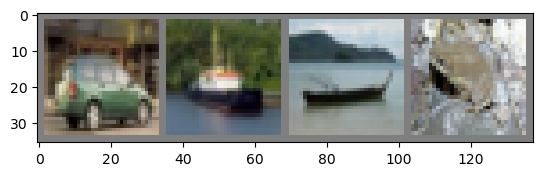

Label:    car    ship    ship    frog
Pred:   frog     ship     ship     frog


In [10]:
# test LeNet

# define a function that displays an image
def imageshow(image):
    # un-normalize the image
    image = image/2 + 0.5     
    npimage = image.numpy()
    plt.imshow(np.transpose(npimage, (1, 2, 0)))
    plt.show()

# load test dataset images
d_iter = iter(test_loader)
im, labels = d_iter.next()

# print images and ground truth
imageshow(torchvision.utils.make_grid(im[:4]))
print('Label: ', '   '.join('%5s' % classes[labels[j]] for j in range(4)))

# load model
lenet_cached = LeNet()
lenet_cached.load_state_dict(torch.load(model_path))
# model inference
output = lenet_cached(im)

# print predictions
_, pred = torch.max(output, 1)

print('Pred: ', '    '.join('%5s' % classes[pred[j]] for j in range(4)))

In [11]:
correct = 0
counter = 0
with torch.no_grad():
    for idx, (x, labels) in enumerate(test_loader):
        output = lenet_cached(x)
        _, pred = torch.max(output.data, 1)
        counter += labels.size(0)
        correct += (pred == labels).sum().item()
print('Model accuracy from test dataset: %d %%' % (100 * correct / counter))

Model accuracy from test dataset: 58 %


In [12]:
class_correct = list(0. for i in range(10))
class_counter = list(0. for i in range(10))

with torch.no_grad():
    for idx, (x, labels) in enumerate(test_loader):
        output = lenet_cached(x)
        _, pred = torch.max(output, 1)
        c = (pred == labels).squeeze() # shape batch_size 10000
        for i in range(10000):
            labels_current = labels[i]
            class_correct[labels_current] += c[i].item()
            class_counter[labels_current] += 1
            
for i in range(10):
    print('Model accuracy for class %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_counter[i]))

Model accuracy for class plane : 50 %
Model accuracy for class   car : 73 %
Model accuracy for class  bird : 51 %
Model accuracy for class   cat : 28 %
Model accuracy for class  deer : 55 %
Model accuracy for class   dog : 49 %
Model accuracy for class  frog : 79 %
Model accuracy for class horse : 58 %
Model accuracy for class  ship : 81 %
Model accuracy for class truck : 57 %
